Knygų duomenų su aprašymais nuskaitymas iš .csv failo

In [1]:
import pandas as pd
data_file = 'Grozines_knygu_duomenys.csv'
data = pd.read_csv(data_file, sep=',', encoding='utf-8')
data['ISBN'] = data['ISBN'].astype(str)
data['ISBN'] = data['ISBN'].str.replace('.0', '', regex=False)
data = data.drop("Aprašymas", axis=1)
data = data.rename(columns={"Ilgis": "Plotis", "Plotis": "Ilgis"})

data.head(2)

,Pavadinimas,Autorius,Žanras,Metai,Puslapiai,Kaina,Akcijinė kaina,Perskaitytos kaina,ISBN,Leidėjas,Viršelio tipas,Plotis,Ilgis,Storis,Kalba,Vertėjas,Įvertinimų skaičius,Žvaigždučių skaičius
0,… gloria mundi,Vygandas Ostrauskis,Lietuvių autorių romanai,2018,244,10.21,9.19,0.0,9786098092660,Kauko laiptai,kieti,17.0,24.0,1.8,Lietuvių,NaN,5,5
1,...kai akyse suspindi ilgesys...,Sandra Avižienytė,"Poezija, drama, esė",2005,88,0.00,0.00,0.0,9789955435679,Pasviręs pasaulis,kieti,8.0,1.0,NaN,Lietuvių,NaN,1,5


Duomenų tvarkymas

In [52]:
data_cleaned = data.drop(index=[11160, 3096, 5144, 13887, 10973, 122, 12, 13783], errors='ignore') #Pašalinami likę knygų rinkiniai
# atliekama knygų išmatavimų korekcija 
data_cleaned.loc[12286, ['Ilgis', 'Plotis', 'Storis']] = [24.2, 15, 2.7] 
data_cleaned.loc[10838, ['Ilgis', 'Plotis', 'Storis']] = [15.0, 14.1, 1.2]
data_cleaned.loc[3429, ['Ilgis', 'Plotis', 'Storis']] = [10.5, 21, 0.0]
df_sorted = data_cleaned.sort_values(by='Kaina', ascending=False) # surikiuoti knygas pagal kainą
data_cleaned.head(2)

,Pavadinimas,Autorius,Žanras,Metai,Puslapiai,Kaina,Akcijinė kaina,Perskaitytos kaina,ISBN,Leidėjas,Viršelio tipas,Plotis,Ilgis,Storis,Kalba,Vertėjas,Įvertinimų skaičius,Žvaigždučių skaičius
0,… gloria mundi,Vygandas Ostrauskis,Lietuvių autorių romanai,2018,244,10.21,9.19,0.0,9786098092660,Kauko laiptai,kieti,17.0,24.0,1.8,Lietuvių,NaN,5,5
1,...kai akyse suspindi ilgesys...,Sandra Avižienytė,"Poezija, drama, esė",2005,88,0.00,0.00,0.0,9789955435679,Pasviręs pasaulis,kieti,8.0,1.0,NaN,Lietuvių,NaN,1,5


Knygų pasiskirstymas pagal žanrą

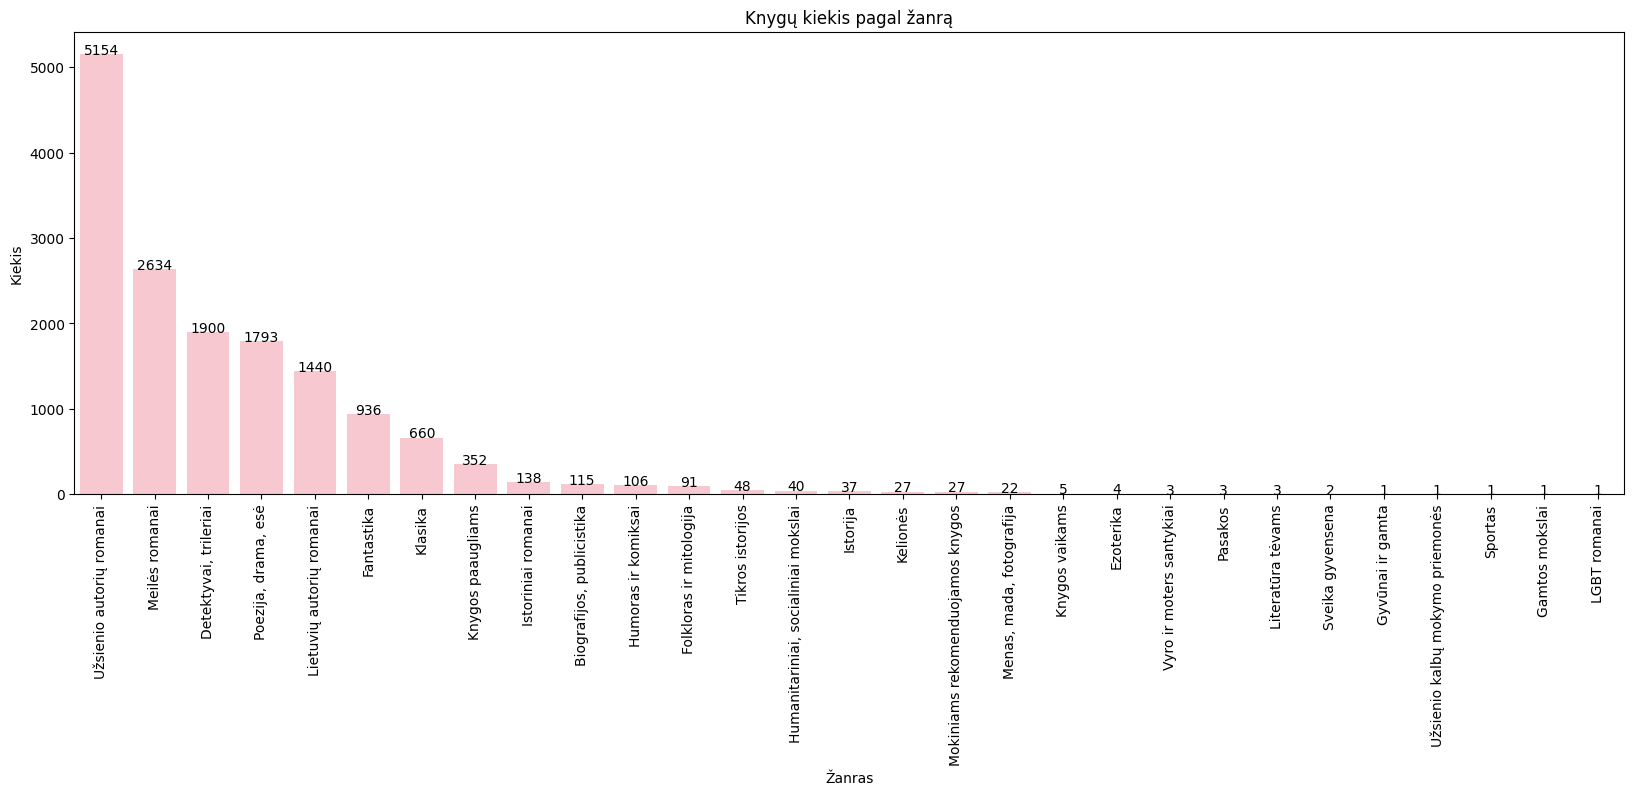

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suskaičiuoti kiekvieno žanro knygų kiekį
df = data_cleaned
genre_counts = df['Žanras'].value_counts().reset_index()
genre_counts.columns = ['Žanras', 'Kiekis']

plt.figure(figsize=(20, 6))
ax = sns.barplot(data=genre_counts, x="Žanras", y="Kiekis", color='pink')

# Pridėti reikšmes virš kiekvieno stulpelio
for index, row in genre_counts.iterrows():
    ax.text(index, row.Kiekis + 0.5, row.Kiekis, ha="center")

plt.title("Knygų kiekis pagal žanrą")
plt.xlabel("Žanras")
plt.ylabel("Kiekis")
plt.xticks(rotation=90)
plt.show()

Knygų kainų pasiskirstymas

                                             Pavadinimas  \
11971  Sielos preliudai. Preludes of soul. Preliudy d...   
158    Adomo Mickevičiaus poezija. Pirmas tomas. Poez...   
13736  TROŠKIMAS. Nr. 1 New York Times bestseleris – ...   
15235                                      Žemės stulpai   
5828       Kotryna Jogailaitė. Rožės ir akmens karalienė   
...                                                  ...   
5898                              Krikšto motinos dovana   
2186                                         Dešimt metų   
9951                                Penktadienis, 13-oji   
3365                         Geriausias anglų sąmojis II   
3364                          Geriausias anglų sąmojis I   

                      Autorius                     Žanras  Metai  Puslapiai  \
11971         Silvija Beatričė        Poezija, drama, esė   2017        114   
158         Adomas Mickevičius        Poezija, drama, esė   2022        488   
13736              Tracy Wolff          Kn

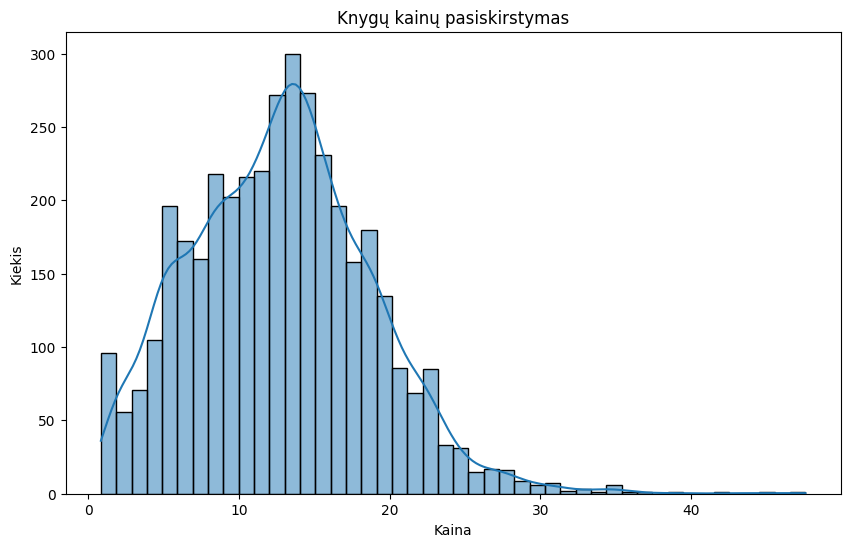

In [85]:
df_price = data_cleaned.drop(data_cleaned[data_cleaned["Kaina"] == 0].index)
print(df_price.sort_values(by='Kaina', ascending=False))
plt.figure(figsize=(10, 6))
sns.histplot(data=df_price["Kaina"], kde=True)
plt.title("Knygų kainų pasiskirstymas")
plt.xlabel("Kaina")
plt.ylabel("Kiekis")
plt.show()

Knygų kainų pasiskirstymas pagal žanrą

<function matplotlib.pyplot.show(close=None, block=None)>

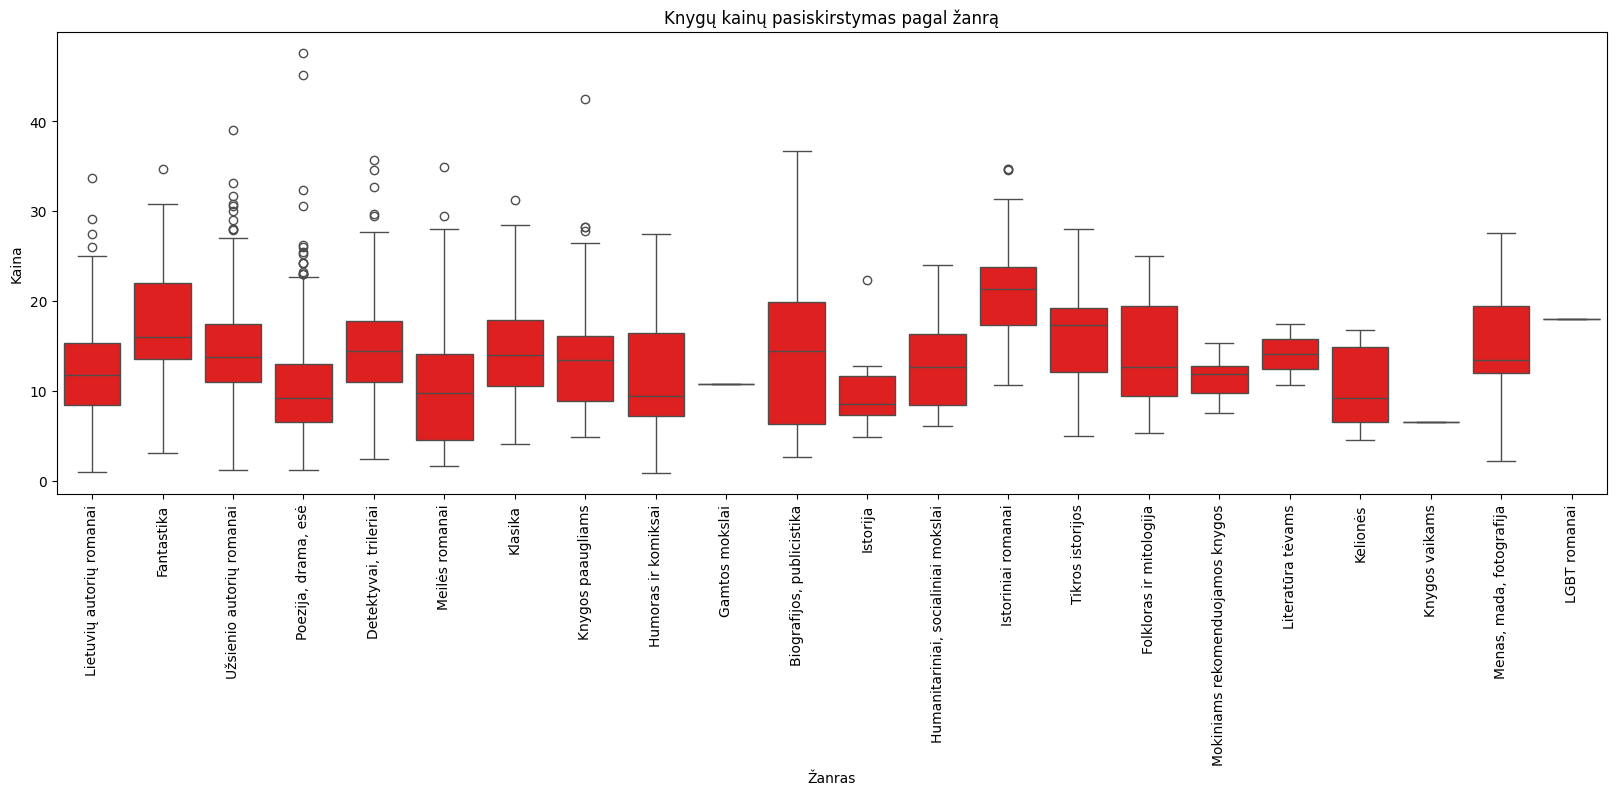

In [50]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Žanras', y='Kaina', data=df_price, color= 'red')
plt.title("Knygų kainų pasiskirstymas pagal žanrą")
plt.xticks(rotation=90)
plt.show

In [51]:
df_price.sort_values('Kaina').head(3) # surikiuoti knygų duomenys pagal kainą, kuri > 0

,Pavadinimas,Autorius,Žanras,Metai,Puslapiai,Kaina,Akcijinė kaina,Perskaitytos kaina,ISBN,Leidėjas,Viršelio tipas,Plotis,Ilgis,Storis,Kalba,Vertėjas,Įvertinimų skaičius,Žvaigždučių skaičius
3365,Geriausias anglų sąmojis II,Karen Booth (Karen Būt),Humoras ir komiksai,2004,240,0.84,0.76,0.00,9789955510284,Ramduva,minkšti,7.0,9.0,0.5,Lietuvių,NaN,1,5
3364,Geriausias anglų sąmojis I,Karen Booth (Karen Būt),Humoras ir komiksai,2004,240,0.84,0.76,0.00,9789955510277,Ramduva,minkšti,7.0,9.0,0.5,Lietuvių,NaN,0,0
9951,"Penktadienis, 13-oji",Zurabas Džavachišvilis,Lietuvių autorių romanai,2016,192,0.99,0.79,0.99,9786098159219,Magilė,minkšti,14.0,21.0,1.6,Lietuvių,NaN,2,5


In [53]:
df_sorted.tail(3) # surikiuoti pagal kainą su nulinėmis reikšmėmis

,Pavadinimas,Autorius,Žanras,Metai,Puslapiai,Kaina,Akcijinė kaina,Perskaitytos kaina,ISBN,Leidėjas,Viršelio tipas,Plotis,Ilgis,Storis,Kalba,Vertėjas,Įvertinimų skaičius,Žvaigždučių skaičius
1655,Bjauriojo ančiuko hobis,Darja Doncova,"Detektyvai, trileriai",2002,304,0.0,0.0,3.50,9789955527336,Mileda,minkšti,13.0,20.0,NaN,Lietuvių,Eglė Černiauskaitė,0,4
7136,Mažosios išpažintys,Vytautas Bubnys,Lietuvių autorių romanai,1988,254,0.0,0.0,3.39,5790000673,Vyturys,kieti,5.0,1.0,0.5,Lietuvių,NaN,0,0
15552,Zytarų šeima II dalis,Vilis Lacis,Užsienio autorių romanai,1979,454,0.0,0.0,4.59,nan,Vaga,kieti,13.0,20.0,0.5,Lietuvių,Aleksandras Žirgulys,0,0


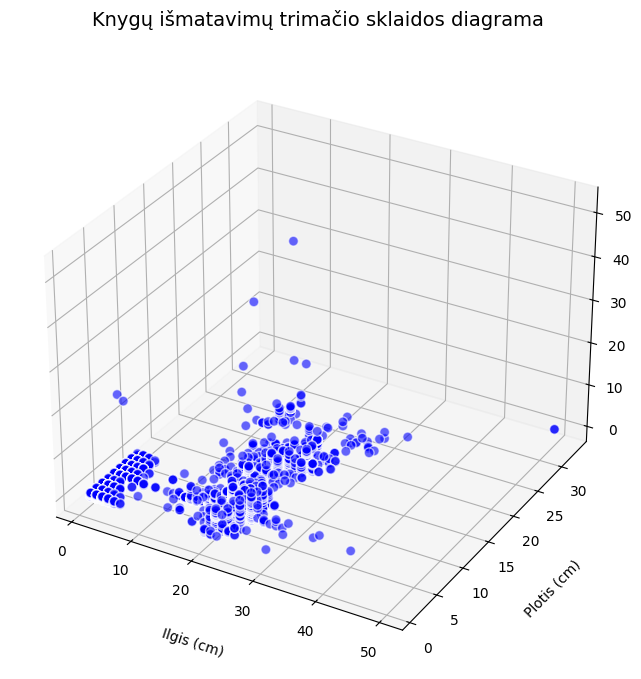

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Pašalinti eilutes, kuriose bet kuris išmatavimas yra 0.00
data_filtered = df[(df['Ilgis'] > 0) & (df['Plotis'] > 0) & (df['Storis'] > 0)]

# 2. Sukurti 3D sklaidos grafiką
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Pridėti taškus į grafiką
ax.scatter(
    data_filtered['Ilgis'], 
    data_filtered['Plotis'], 
    data_filtered['Storis'], 
    c='blue', 
    alpha=0.6, 
    edgecolors='w', 
    s=50
)

# Nustatyti ašių pavadinimus
ax.set_xlabel('Ilgis (cm)', fontsize=10, labelpad=15)  # Pridėtas labelpad, kad atitrauktų tekstą
ax.set_ylabel('Plotis (cm)', fontsize=10, labelpad=15)
ax.set_zlabel('Storis (mm)', fontsize=10, labelpad=15)  # Pridėtas labelpad, jei tekstas užlenda

# Nustatyti grafiko pavadinimą
ax.set_title('Knygų išmatavimų trimačio sklaidos diagrama', fontsize=14, pad=20)

# Parodyti grafiką
plt.show()

In [65]:
df_publisher = df['Leidėjas'].value_counts()
publisher_more_than_50 = df_publisher[df_publisher > 50]

print(publisher_more_than_50)

Leidėjas
Alma littera                                     2229
Vaga                                             1931
Svajonių knygos                                  1309
Tyto alba                                         845
Jotema                                            802
Baltos lankos                                     763
Lietuvos rašytojų sąjungos leidykla               728
Eridanas                                          586
Obuolys                                           549
Rosma                                             313
Valstybinė grožinės literatūros leidykla          300
Sofoklis                                          297
BALTO leidybos namai                              267
Kitos knygos                                      261
Tyrai                                             240
Mintis                                            221
Versus Aureus                                     174
Gimtasis žodis                                    150
Homo liber         

C:\Users\edita\AppData\Local\Temp\ipykernel_32312\1776132088.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


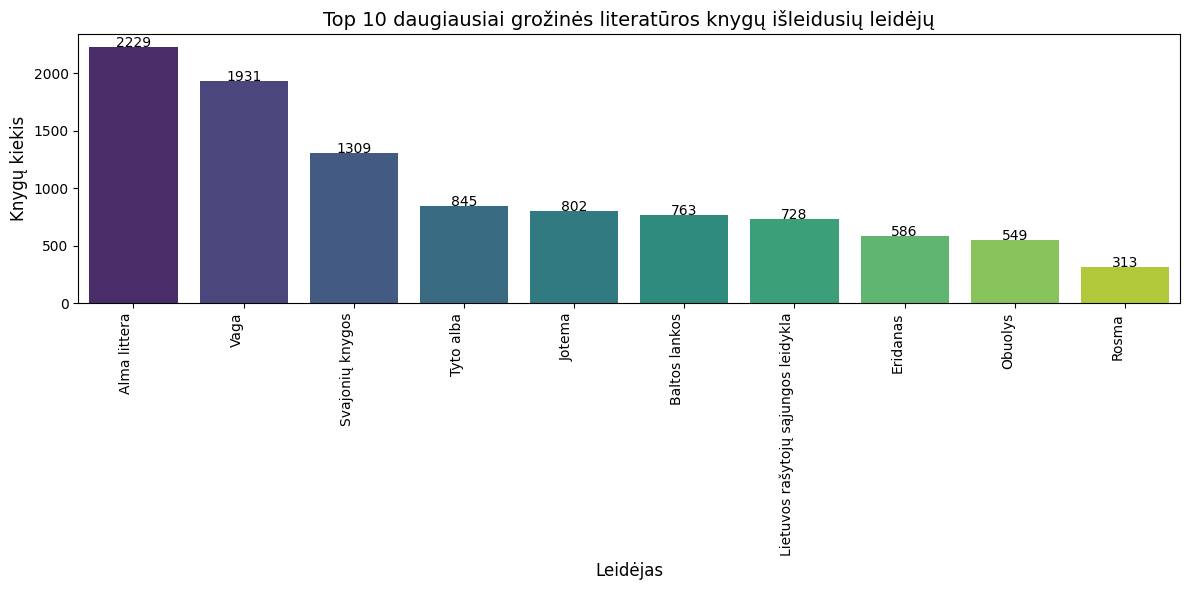

In [66]:
# 1. Grupavimas pagal leidėją ir knygų skaičiaus skaičiavimas
df_publisher = df['Leidėjas'].value_counts()

# 2. Atrinkti 10 daugiausiai knygų išleidusių leidėjų
top_10_publishers = df_publisher.head(10)

# 3. Sukurti stulpelinę diagramą
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_10_publishers.index, 
    y=top_10_publishers.values, 
    palette="viridis"
)

# 4. Pridėti reikšmes virš stulpelių
for index, value in enumerate(top_10_publishers.values):
    ax.text(index, value + 1, str(value), ha='center', fontsize=10)  # Pakeiskite value + 1, jei reikšmės užlenda

# 5. Pavadinimai ir formatavimas
plt.title('Top 10 daugiausiai grožinės literatūros knygų išleidusių leidėjų', fontsize=14)
plt.xlabel('Leidėjas', fontsize=12)
plt.ylabel('Knygų kiekis', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Pasukame x ašies etiketes
plt.tight_layout()
plt.show()

C:\Users\edita\AppData\Local\Temp\ipykernel_32312\571665161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


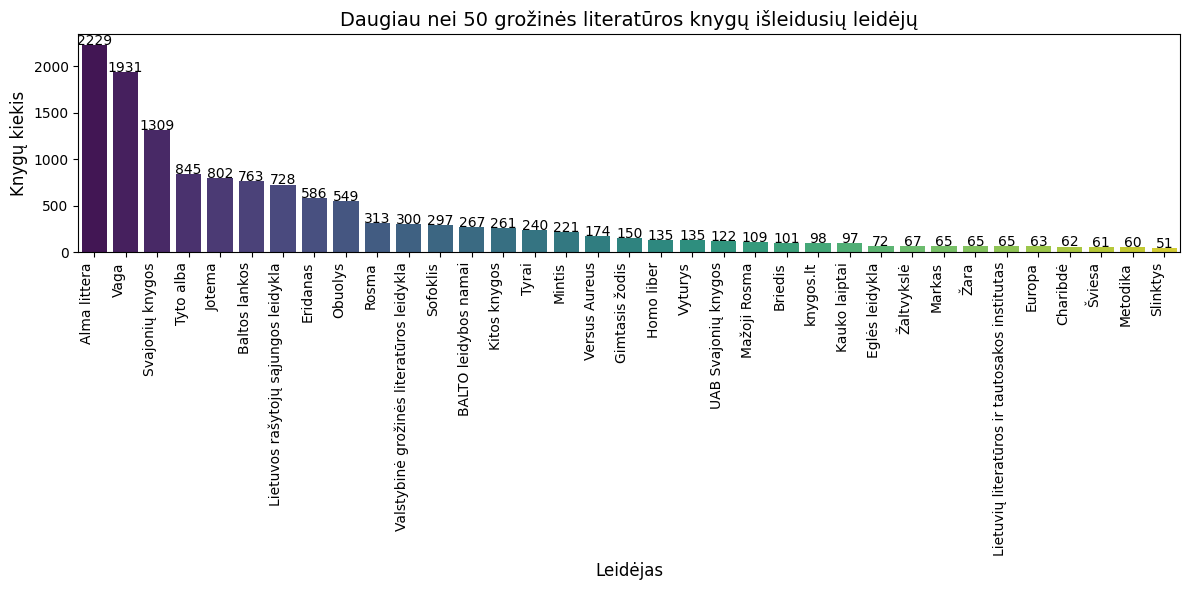

In [68]:
# 3. Sukurti stulpelinę diagramą
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=publisher_more_than_50.index, 
    y=publisher_more_than_50.values, 
    palette="viridis"
)

# 4. Pridėti reikšmes virš stulpelių
for index, value in enumerate(publisher_more_than_50.values):
    ax.text(index, value + 1, str(value), ha='center', fontsize=10)  # Pakeiskite value + 1, jei reikšmės užlenda

# 5. Pavadinimai ir formatavimas
plt.title('Daugiau nei 50 grožinės literatūros knygų išleidusių leidėjų', fontsize=14)
plt.xlabel('Leidėjas', fontsize=12)
plt.ylabel('Knygų kiekis', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Pasukame x ašies etiketes
plt.tight_layout()
plt.show()

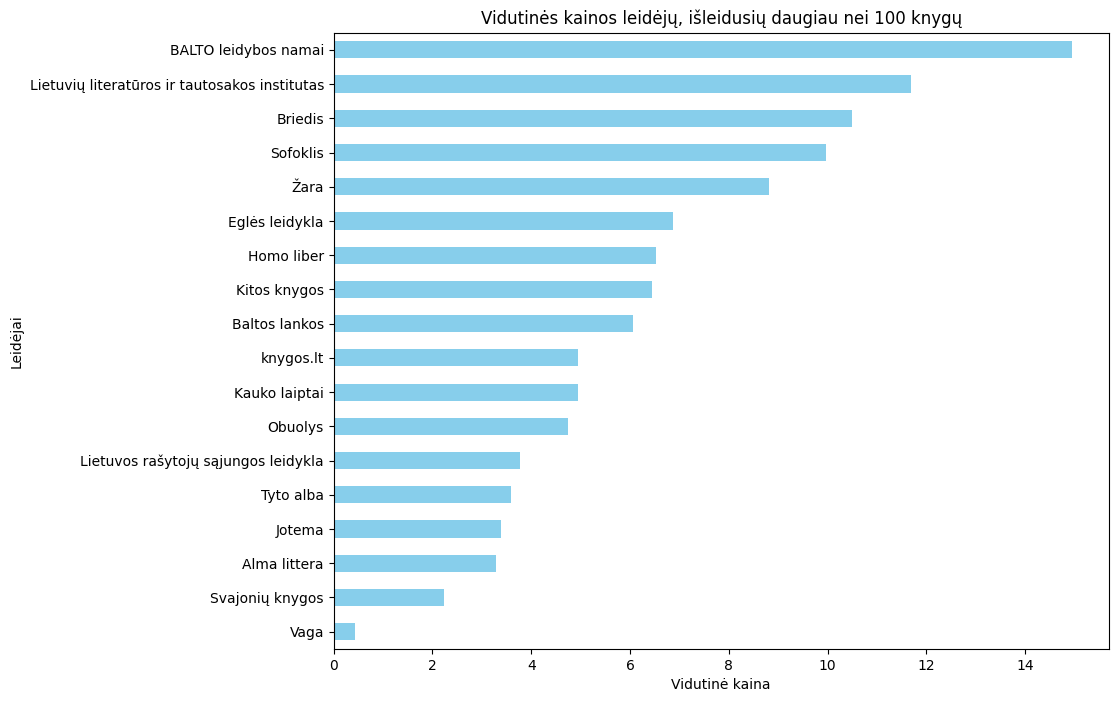

In [87]:
# Grupuoti pagal leidėją ir suskaičiuoti knygų kiekius
leidėjų_knygų_skaičius = df_price.groupby('Leidėjas').size()

# Filtruoti leidėjus, kurie išleido daugiau nei 100 knygų
leidėjai_virš_50 = leidėjų_knygų_skaičius[leidėjų_knygų_skaičius > 50].index

# Filtruoti duomenis pagal šiuos leidėjus
filtruoti_duomenys = data_cleaned[data_cleaned['Leidėjas'].isin(leidėjai_virš_50)]

# Apskaičiuoti vidutinę kainą
vidutinė_kaina =  filtruoti_duomenys.groupby('Leidėjas')['Kaina'].mean()

vidutinė_kaina.sort_values().plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Vidutinės kainos leidėjų, išleidusių daugiau nei 100 knygų')
plt.xlabel('Vidutinė kaina')
plt.ylabel('Leidėjai')
plt.show()

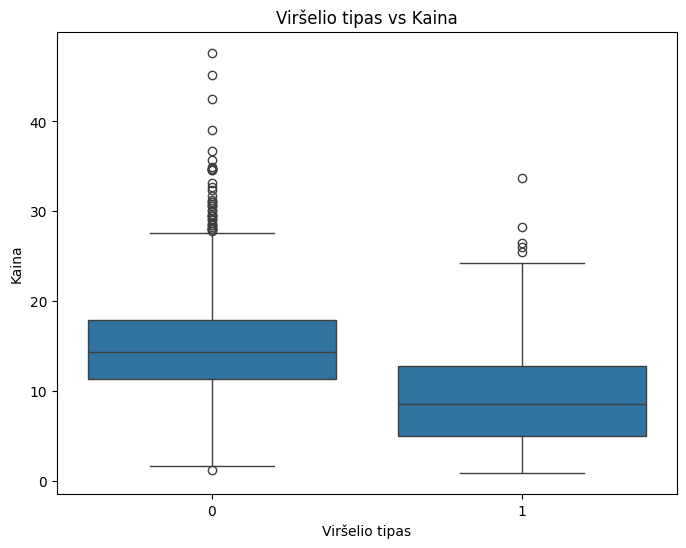

In [ ]:
# TODO viršelio tipo skaitmenizavimas
# TODO nulinių reikšmių išėmimas

from sklearn.preprocessing import LabelEncoder

# Jei viršelio tipo stulpelis yra kategorinis ("storas" ir "plonas"), koduojame jį
le = LabelEncoder()
df_price['Viršelio tipas'] = le.fit_transform(df_price['Viršelio tipas'])  # "storas" -> 0, "plonas" -> 1

# Pašalinti eilutes su NaN reikšmėmis stulpeliuose
df_format = df_price.dropna(subset=['Plotis', 'Ilgis', 'Storis', 'Kaina', 'Viršelio tipas'])

# Vizualizacija: Box plot, kaip viršelio tipas veikia kainą
plt.figure(figsize=(8, 6))
sns.boxplot(x='Viršelio tipas', y='Kaina', data=df_format)
plt.title('Viršelio tipas vs Kaina')
plt.xlabel('Viršelio tipas')
plt.ylabel('Kaina')
plt.show()

